# Credit Card Default Prediction

## Data Preprocessing

In [52]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


In [53]:
# Avoid warnings caused by inplace column name reassignment
pd.options.mode.chained_assignment = None

# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
features = default_of_credit_card_clients.data.features
targets = default_of_credit_card_clients.data.targets

Rename feature columns to be more descriptive

In [54]:
# Rename columns for better understanding
features.rename(inplace=True,
                columns={
                    'X1': 'CREDIT_LIMIT',  # Credit limit (NT dollar)
                    'X2': 'GENDER',  # Gender (1 = male; 2 = female)
                    'X3': 'EDUCATION_LEVEL',  # Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
                    'X4': 'MARITAL_STATUS',  # Marital status (1 = married; 2 = single; 3 = others)
                    'X5': 'AGE',  # (years)

                    # X6 - X11 is repayment status
                    # The measurement scale for the repayment status is:
                    # -1 = pay duly;
                    # 1 = payment delay for one month;
                    # 2 = payment delay for two months;
                    # . . .;
                    # 8 = payment delay for eight months;
                    # 9 = payment delay for nine months and above.
                    'X6': 'SEPT_PAY_STATUS',  # repayment status in September, 2005
                    'X7': 'AUG_PAY_STATUS',  # repayment status in August, 2005
                    'X8': 'JULY_PAY_STATUS',  # repayment status in July, 2005
                    'X9': 'JUNE_PAY_STATUS',  # repayment status in June, 2005
                    'X10': 'MAY_PAY_STATUS',  # repayment status in May, 2005
                    'X11': 'APRIL_PAY_STATUS',  # repayment status in April, 2005

                    # X12 - X17 is amount of bill statement (NT dollar)
                    'X12': 'SEPT_BILL',  # amount of bill statement in September, 2005
                    'X13': 'AUG_BILL',  # amount of bill statement in August, 2005
                    'X14': 'JULY_BILL',  # amount of bill statement in July, 2005
                    'X15': 'JUNE_BILL',  # amount of bill statement in June, 2005
                    'X16': 'MAY_BILL',  # amount of bill statement in May, 2005
                    'X17': 'APRIL_BILL',  # amount of bill statement in April, 2005

                    # X18 - X23 is amount of previous payment (NT dollar)
                    'X18': 'SEPT_PAYMENT',  # amount paid in September, 2005
                    'X19': 'AUG_PAYMENT',  # amount paid in August, 2005
                    'X20': 'JULY_PAYMENT',  # amount paid in July, 2005
                    'X21': 'JUNE_PAYMENT',  # amount paid in June, 2005
                    'X22': 'MAY_PAYMENT',  # amount paid in May, 2005
                    'X23': 'APRIL_PAYMENT',  # amount paid in April, 2005
                })

# Display the updated dataframe
features.head()


,CREDIT_LIMIT,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,AGE,SEPT_PAY_STATUS,AUG_PAY_STATUS,JULY_PAY_STATUS,JUNE_PAY_STATUS,MAY_PAY_STATUS,...,JULY_BILL,JUNE_BILL,MAY_BILL,APRIL_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUNE_PAYMENT,MAY_PAYMENT,APRIL_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Rename target column to be more descriptive

In [55]:
targets.rename(inplace = True,
               columns={'Y': 'DEFAULT'} # Default payment next month
              )

targets.head()

,DEFAULT
0,1
1,1
2,0
3,0
4,0


## Exploratory Data Analysis

CREDIT_LIMIT        0
GENDER              0
EDUCATION_LEVEL     0
MARITAL_STATUS      0
AGE                 0
SEPT_PAY_STATUS     0
AUG_PAY_STATUS      0
JULY_PAY_STATUS     0
JUNE_PAY_STATUS     0
MAY_PAY_STATUS      0
APRIL_PAY_STATUS    0
SEPT_BILL           0
AUG_BILL            0
JULY_BILL           0
JUNE_BILL           0
MAY_BILL            0
APRIL_BILL          0
SEPT_PAYMENT        0
AUG_PAYMENT         0
JULY_PAYMENT        0
JUNE_PAYMENT        0
MAY_PAYMENT         0
APRIL_PAYMENT       0
DEFAULT             0
dtype: int64
         CREDIT_LIMIT        GENDER  EDUCATION_LEVEL  MARITAL_STATUS  \
count    30000.000000  30000.000000     30000.000000    30000.000000   
mean    167484.322667      1.603733         1.853133        1.551867   
std     129747.661567      0.489129         0.790349        0.521970   
min      10000.000000      1.000000         0.000000        0.000000   
25%      50000.000000      1.000000         1.000000        1.000000   
50%     140000.000000      

<Figure size 1200x800 with 0 Axes>

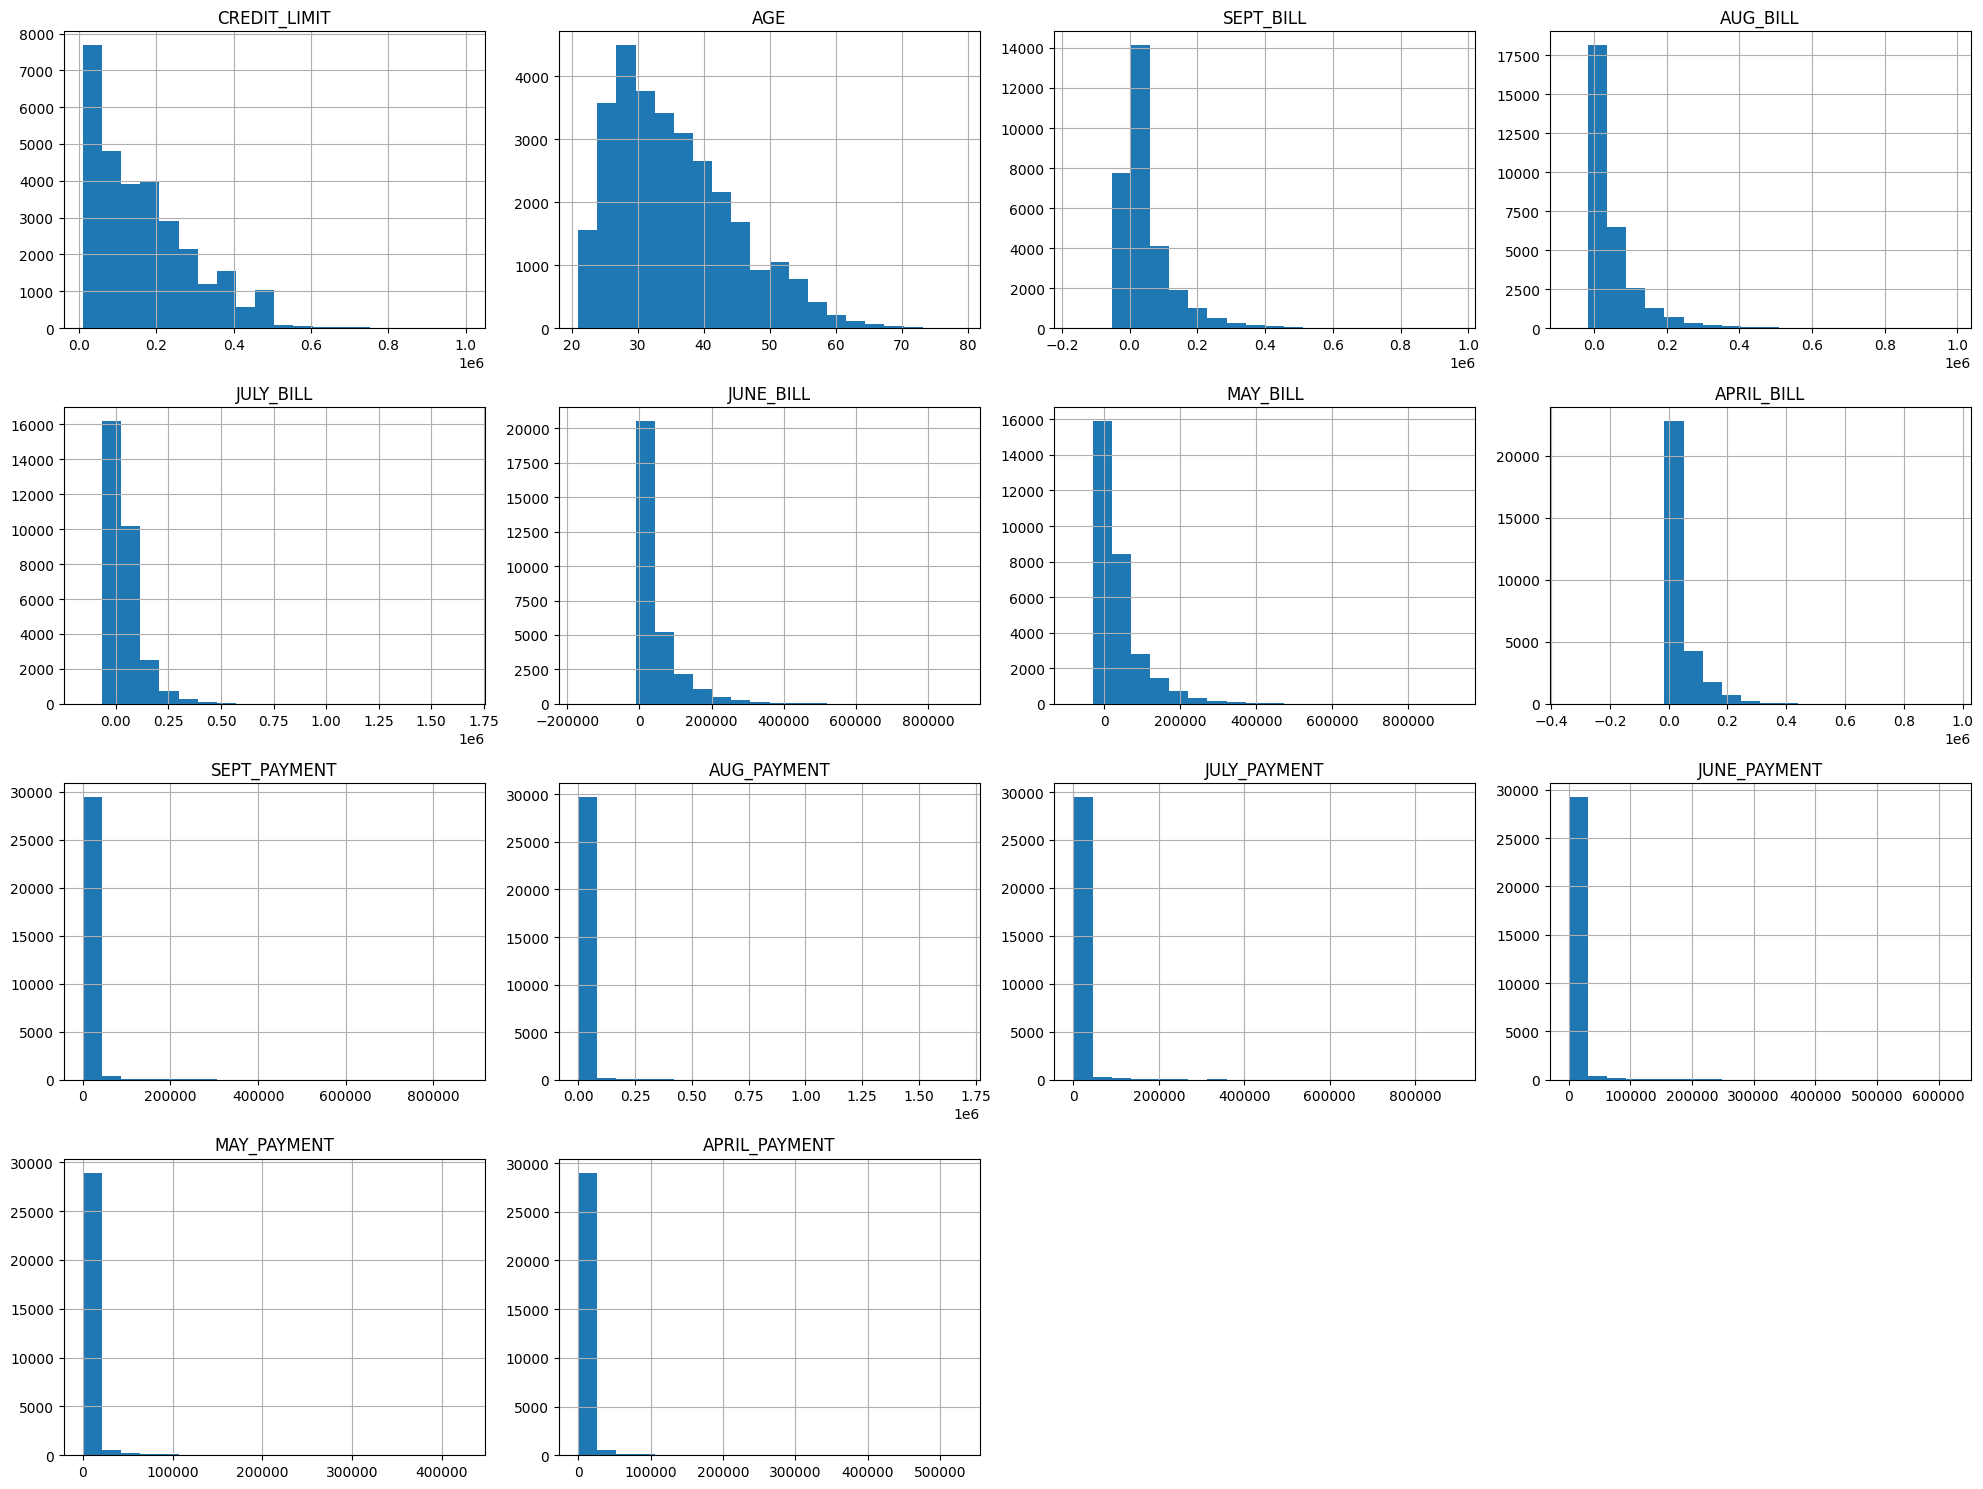

In [56]:
# Combine features and targets for EDA
data = pd.concat([features, targets], axis=1)

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Plot distributions of numerical variables
numerical_features = [
    'CREDIT_LIMIT', 'AGE', 'SEPT_BILL', 'AUG_BILL', 'JULY_BILL',
    'JUNE_BILL', 'MAY_BILL', 'APRIL_BILL', 'SEPT_PAYMENT',
    'AUG_PAYMENT', 'JULY_PAYMENT', 'JUNE_PAYMENT', 'MAY_PAYMENT',
    'APRIL_PAYMENT'
]

plt.figure(figsize=(12, 8))
data[numerical_features].hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()



## Outlier Detection and Handling

In [57]:
def cap_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        print(f"{column}: {len(outliers)} outliers capped.")
        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

features = cap_outliers(features, numerical_features)



CREDIT_LIMIT: 167 outliers capped.
AGE: 272 outliers capped.
SEPT_BILL: 2400 outliers capped.
AUG_BILL: 2395 outliers capped.
JULY_BILL: 2469 outliers capped.
JUNE_BILL: 2622 outliers capped.
MAY_BILL: 2725 outliers capped.
APRIL_BILL: 2693 outliers capped.
SEPT_PAYMENT: 2745 outliers capped.
AUG_PAYMENT: 2714 outliers capped.
JULY_PAYMENT: 2598 outliers capped.
JUNE_PAYMENT: 2994 outliers capped.
MAY_PAYMENT: 2945 outliers capped.
APRIL_PAYMENT: 2958 outliers capped.


## Feature Engineering

In [58]:
# Encode categorical variables
features['GENDER'] = features['GENDER'].map({1: 0, 2: 1})  # 1: Male -> 0, 2: Female -> 1
print("GENDER column transformed:", features['GENDER'].unique())

features['EDUCATION_LEVEL'] = features['EDUCATION_LEVEL'].replace({0: 4, 5: 4, 6: 4})  # 4: Others
print("EDUCATION_LEVEL column transformed:", features['EDUCATION_LEVEL'].unique())

features['MARITAL_STATUS'] = features['MARITAL_STATUS'].replace({0: 3})  # 3: Others
print("MARITAL_STATUS column transformed:", features['MARITAL_STATUS'].unique())

# Combine processed features with targets
processed_data = pd.concat([features, targets], axis=1)
print("Processed data sample:")
print(processed_data.head())





GENDER column transformed: [1 0]
EDUCATION_LEVEL column transformed: [2 1 3 4]
MARITAL_STATUS column transformed: [1 2 3]
Processed data sample:
   CREDIT_LIMIT  GENDER  EDUCATION_LEVEL  MARITAL_STATUS   AGE  \
0         20000       1                2               1  24.0   
1        120000       1                2               2  26.0   
2         90000       1                2               2  34.0   
3         50000       1                2               1  37.0   
4         50000       0                2               1  57.0   

   SEPT_PAY_STATUS  AUG_PAY_STATUS  JULY_PAY_STATUS  JUNE_PAY_STATUS  \
0                2               2               -1               -1   
1               -1               2                0                0   
2                0               0                0                0   
3                0               0                0                0   
4               -1               0               -1                0   

   MAY_PAY_STATUS  ...  J

## Normalized Data After Outlier Handling

In [59]:

# Normalize numerical columns
scaler = MinMaxScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])

# Combine normalized features with targets
normalized_data = pd.concat([features, targets], axis=1)

# Display normalized data sample
print(normalized_data.head())


   CREDIT_LIMIT  GENDER  EDUCATION_LEVEL  MARITAL_STATUS       AGE  \
0      0.019417       1                2               1  0.075949   
1      0.213592       1                2               2  0.126582   
2      0.155340       1                2               2  0.329114   
3      0.077670       1                2               1  0.405063   
4      0.077670       0                2               1  0.911392   

   SEPT_PAY_STATUS  AUG_PAY_STATUS  JULY_PAY_STATUS  JUNE_PAY_STATUS  \
0                2               2               -1               -1   
1               -1               2                0                0   
2                0               0                0                0   
3                0               0                0                0   
4               -1               0               -1                0   

   MAY_PAY_STATUS  ...  JUNE_BILL  MAY_BILL  APRIL_BILL  SEPT_PAYMENT  \
0              -2  ...   0.363852  0.365899    0.368450      0.000000   


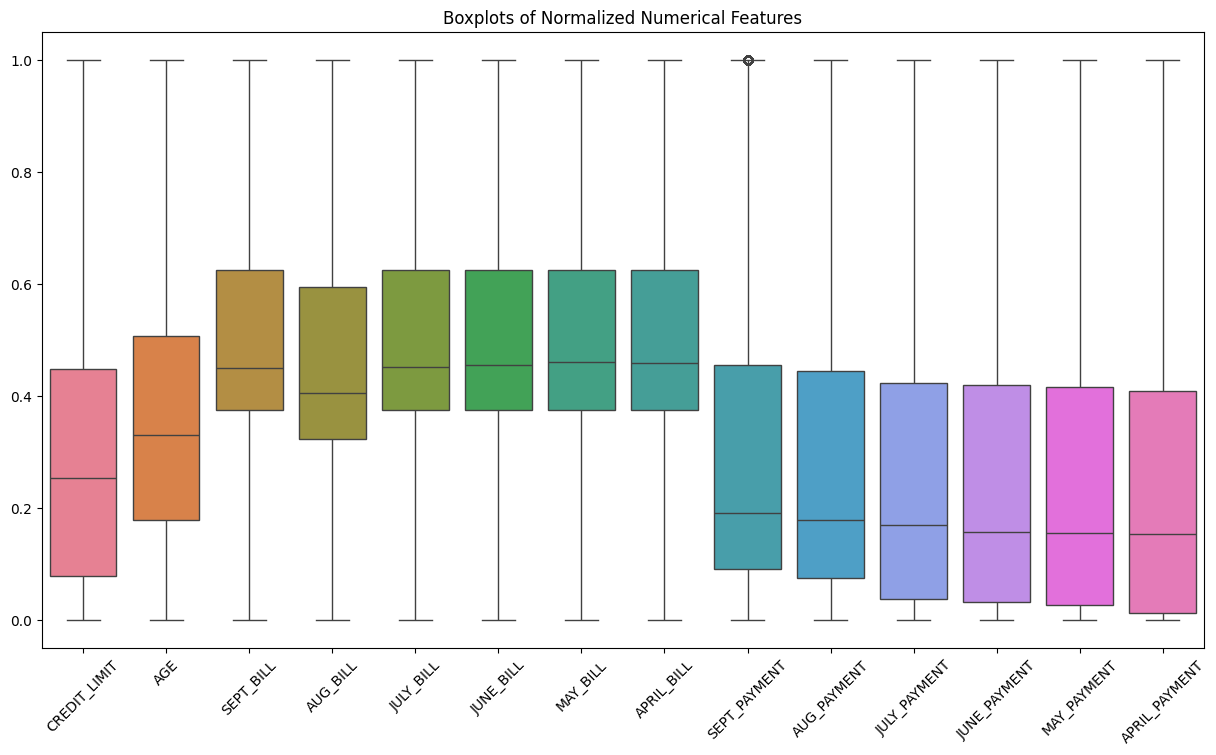

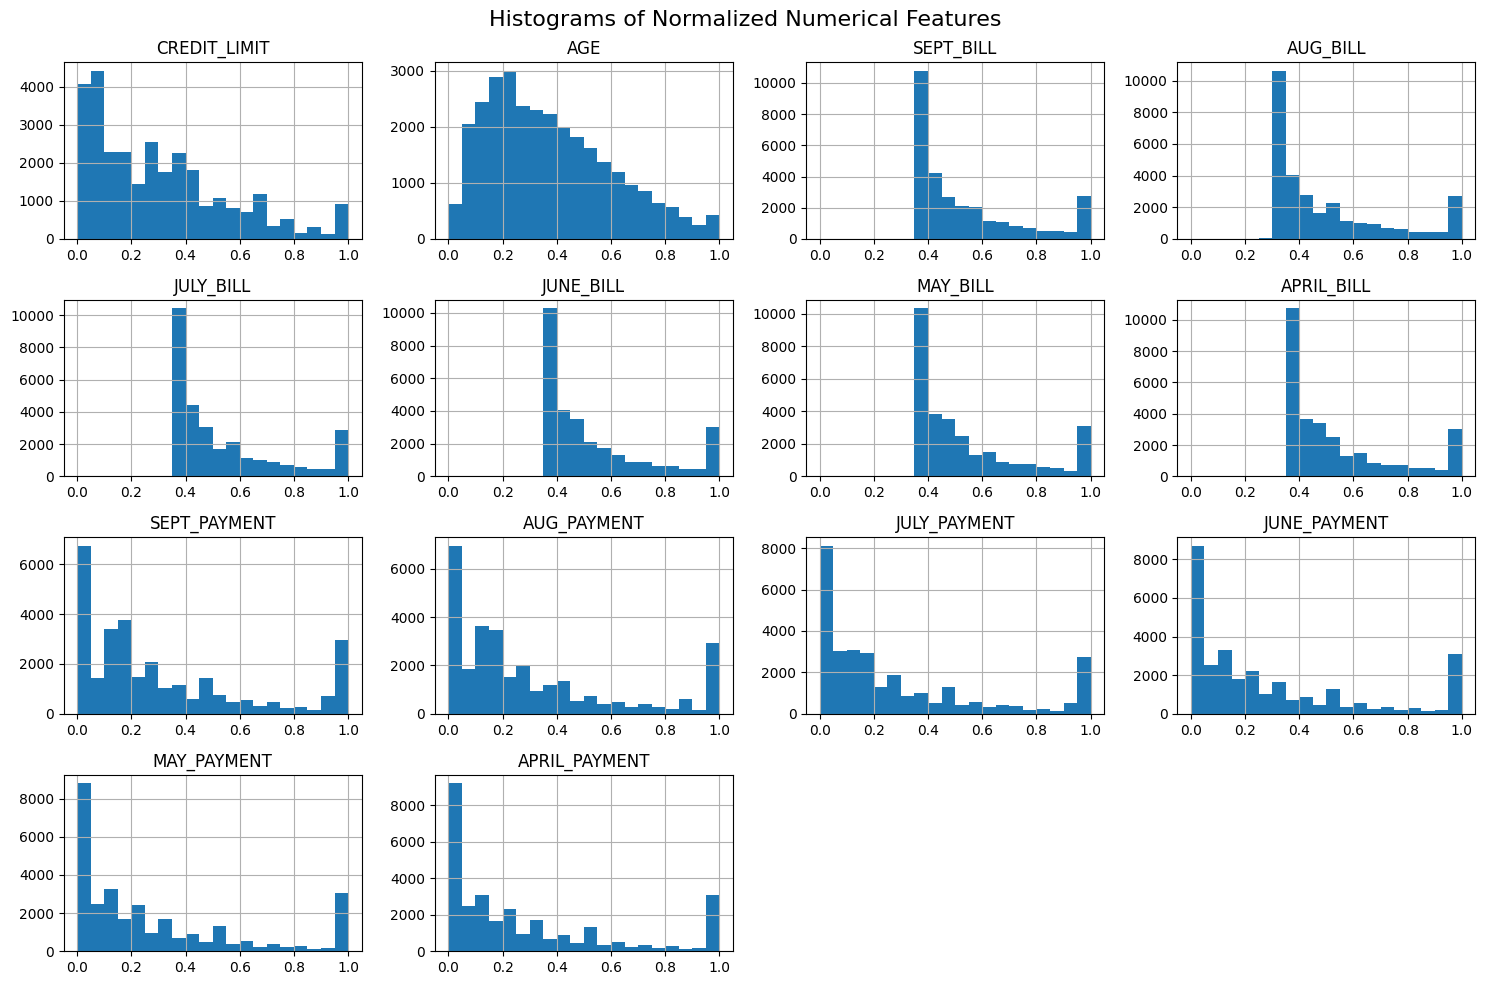

In [60]:
# Visualizing the normalized data

# 1. Boxplots of normalized numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=features[numerical_features])
plt.title("Boxplots of Normalized Numerical Features")
plt.xticks(rotation=45)
plt.show()

# 2. Histograms of normalized features
features[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Normalized Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()



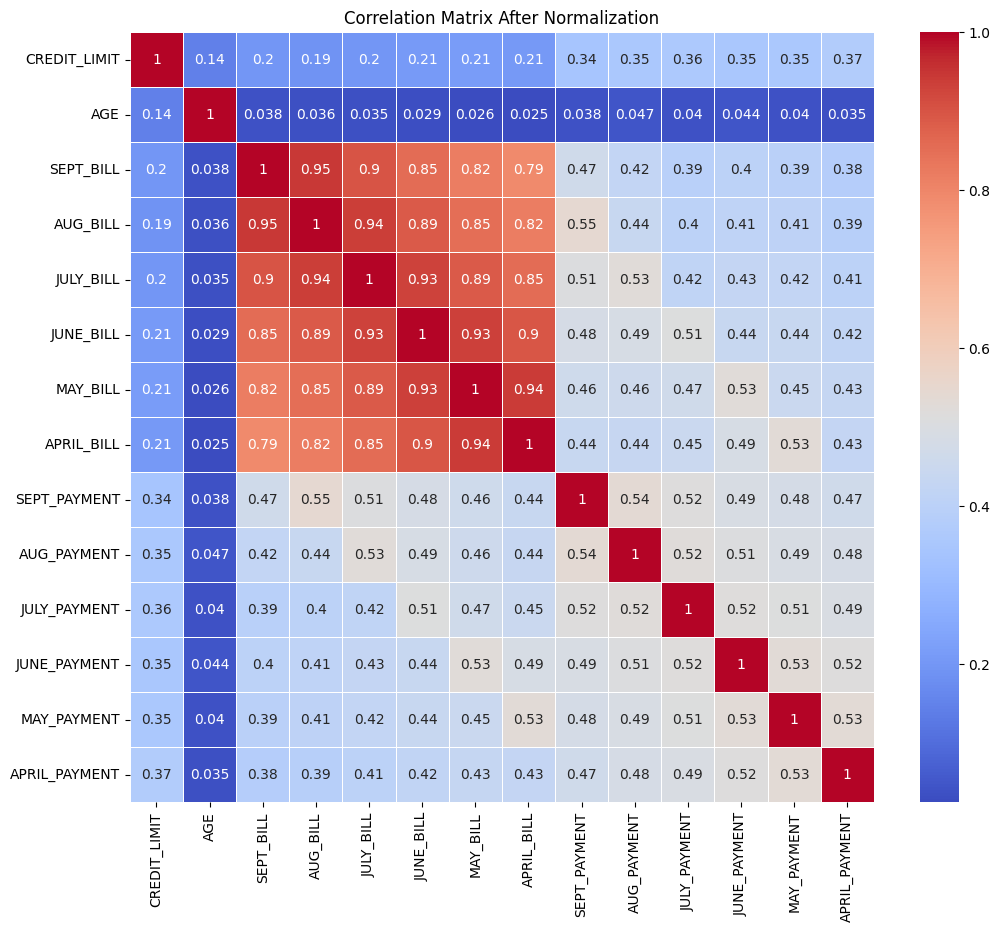

In [67]:
# Compute and visualize the correlation matrix
normalized_correlation_matrix = features[numerical_features].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(normalized_correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Normalization")
plt.show()


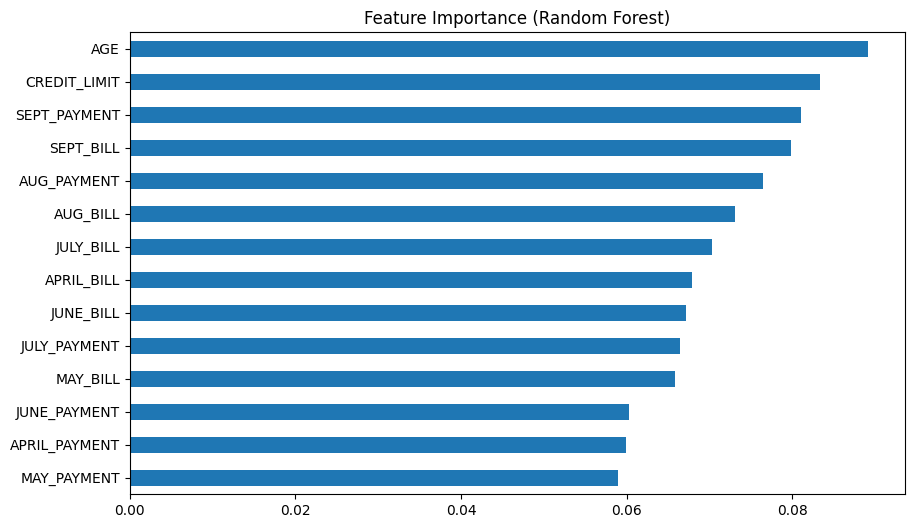

In [64]:

# Train a simple Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(features[numerical_features], targets['DEFAULT'])

# Plot feature importance
importances = pd.Series(rf_model.feature_importances_, index=numerical_features)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance (Random Forest)")
plt.show()


In [65]:
correlation_with_target = processed_data.corr()['DEFAULT'].sort_values(ascending=False)
print("Correlation of Features with Target:")
print(correlation_with_target)


Correlation of Features with Target:
DEFAULT             1.000000
SEPT_PAY_STATUS     0.324794
AUG_PAY_STATUS      0.263551
JULY_PAY_STATUS     0.235253
JUNE_PAY_STATUS     0.216614
MAY_PAY_STATUS      0.204149
APRIL_PAY_STATUS    0.186866
EDUCATION_LEVEL     0.033842
AGE                 0.013687
APRIL_BILL         -0.008845
MAY_BILL           -0.013471
JUNE_BILL          -0.016444
JULY_BILL          -0.020959
AUG_BILL           -0.022782
MARITAL_STATUS     -0.027575
SEPT_BILL          -0.029033
GENDER             -0.039961
MAY_PAYMENT        -0.108081
JUNE_PAYMENT       -0.113716
APRIL_PAYMENT      -0.114552
JULY_PAYMENT       -0.124561
AUG_PAYMENT        -0.139699
SEPT_PAYMENT       -0.143442
CREDIT_LIMIT       -0.154380
Name: DEFAULT, dtype: float64
